## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [8]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
#2 Check the shape of the DataFrame (rows, columns)

df.shape


(545, 13)

In [10]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

df.fillna(df.mean(numeric_only=True), inplace=True)

In [13]:
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Replace missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':  # Categorical data
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:  # Numeric data
            df[column].fillna(df[column].mean(), inplace=True)

# Check missing values after replacement
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)

Missing values before handling:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing values after handling:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [14]:
# df['bathrooms'].unique()

In [15]:
#5 Prepare  X (independent variables) and y (dependent variable)

# Define X (independent variables) and y (dependent variable)

# Assuming 'Price' is the target variable (modify if needed)
# Define independent (X) and dependent (y) variables

X = df.drop(columns=['price'])  # Assuming 'price' is the target variable

y = df['price']

# Display the first few rows of X and y
print("Independent Variables (X):\n", X.head())
print("\nDependent Variable (y):\n", y.head())

Independent Variables (X):
    area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dependent Variable (y):
 0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


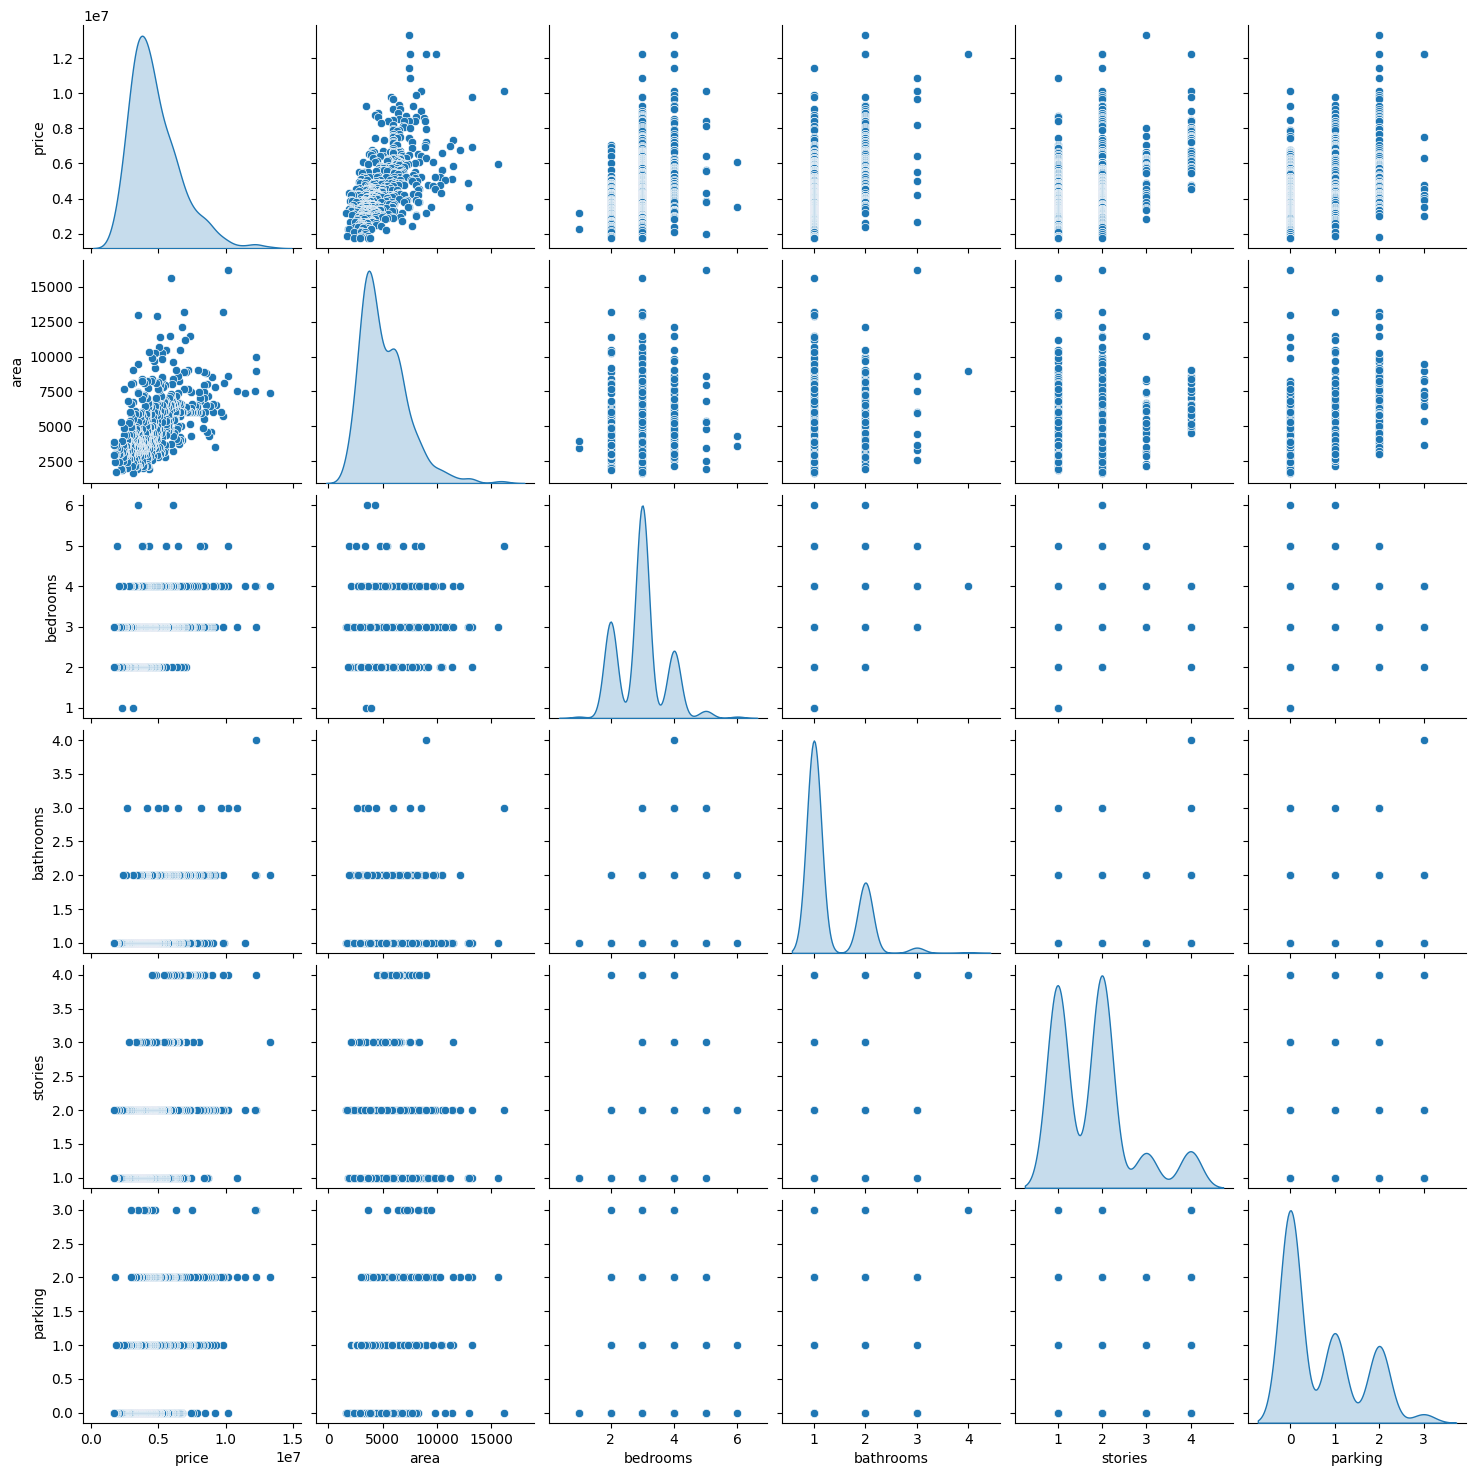

In [16]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
from matplotlib import pyplot as plt
import seaborn as sns
# Combine X and y into a single DataFrame for pairplot
df_combined = df.copy()

# Generate a pairplot
sns.pairplot(df_combined, diag_kind='kde')
plt.show()


In [17]:
# Combine X and y into a single DataFrame for pairplot

df_combined = pd.concat([X, y], axis=1)

# Display the first few rows
print(df_combined.head())

   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus     price  
0              no             yes        2      yes        furnished  13300000  
1              no             yes        3       no        furnished  12250000  
2              no              no        2      yes   semi-furnished  12250000  
3              no             yes        3      yes        furnished  12215000  
4              no             yes        2       no        furnished  11410000  


In [18]:
#7 Encoding categorical data in X

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
X_encoded.head()


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [19]:
#8  Avoiding the Dummy Variable Trap


# 7. Encoding Categorical Data in X
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=False)  # Full One-Hot Encoding
print("Categorical Data Encoded:\n", X_encoded.head())

# 8. Avoiding the Dummy Variable Trap
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # Drops first category
print("\nAfter Avoiding Dummy Variable Trap:\n", X_encoded.head())


Categorical Data Encoded:
    area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  7420         4          2        3        2        False          True   
1  8960         4          4        4        3        False          True   
2  9960         3          2        2        2        False          True   
3  7500         4          2        2        3        False          True   
4  7420         4          1        2        2        False          True   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0          True          False         True         False                True   
1          True          False         True         False                True   
2          True          False        False          True                True   
3          True          False        False          True                True   
4         False           True        False          True                True   

   hotwaterheating_yes 

In [20]:
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [21]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = X_encoded.select_dtypes(include=['int64', 'float64']).columns

# Apply feature scaling
scaler = StandardScaler()
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Display the first few rows after scaling
print(X_encoded.head())


       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692          True   
1  1.757010  1.403419   5.405809  2.532024  2.679409          True   
2  2.218232  0.047278   1.421812  0.224410  1.517692          True   
3  1.083624  1.403419   1.421812  0.224410  2.679409          True   
4  1.046726  1.403419  -0.570187  0.224410  1.517692          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True                          

In [22]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.3,random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (381, 13)
X_test shape: (164, 13)
y_train shape: (381,)
y_test shape: (164,)


In [23]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
#12 Predict on the train set and calculate the error = y_pred - 
y_train_pred=model.predict(X_train)
train_errors=y_train_pred-y_train
train_errors

126   -5.810803e+05
363   -1.098328e+05
370    8.121415e+05
31    -1.926221e+06
113    2.301975e+05
           ...     
71    -2.146252e+05
106    2.505982e+05
270    1.947122e+06
435   -4.602478e+05
102    9.861984e+05
Name: price, Length: 381, dtype: float64

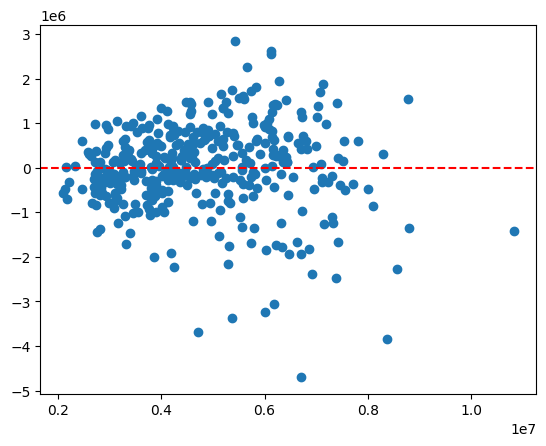

In [35]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
plt.scatter(y_train_pred,train_errors)
plt.axhline(y=0, color='r',linestyle='--')

In [37]:
#14  Predic on the test set
y_test_pred=model.predict(X_test)
test_errors=y_test_pred-y_test

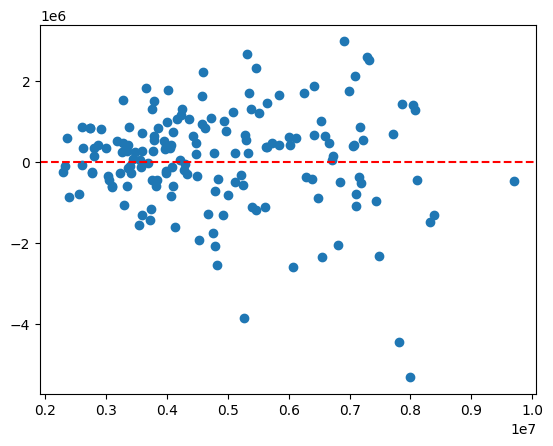

In [40]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_test_pred,test_errors)
plt.axhline(y=0,color='r',linestyle='--')

In [43]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_test_pred)
r2=r2_score(y_test,y_test_pred)
print("mse=",mse)
print("r2=",r2)

mse= 1523019469501.291
r2= 0.6463350878895877


In [47]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

# Adjusted R2=1-(1-R^2)(n11) / (n-p-1)
n=X_test.shape[0]
p=X_test.shape[1]
ar2=1-(1-r2)*((n-1)/(n-p-1))
print(ar2)


0.6156841288400187


In [ ]:
# 10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
# 11 Fitting Multiple Linear Regression to the Training
# 12 Predict on the train set and calculate the error = y_pred - y_train
# 13  Residual plot - plot y_pred in x axis and errors in y axis
# 14  Predic on the test set
# 15 Residual plot - plot y_pred in x axis and errors in y axis
# 16 Print Mean Squared Error and R Squared Value
# 17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)